In [ ]:
#Load Dataset
import pandas as pd
data=pd.read_csv('/content/student_performance.csv')

**Library's Import**

Importing Libraries
This cell imports the necessary libraries for data analysis and machine learning.

pandas is used for data manipulation and analysis.
seaborn and matplotlib.pyplot are used for data visualization.
numpy is used for numerical operations.
sklearn.preprocessing provides tools for preprocessing data, including LabelEncoder and MinMaxScaler.
sklearn.model_selection is used to split the data into training and testing sets.
sklearn.linear_model contains the LinearRegression model.
sklearn.metrics is used to evaluate model performance with metrics like mean squared error and R² score.
sklearn.ensemble provides the RandomForestRegressor model for more advanced regression tasks.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# **Data Cleaning**

In [ ]:
data.shape

(10, 9)

In [ ]:
data.columns

Index(['StudentID', 'Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade'],
      dtype='object')

Describe the dataset

In [ ]:
data.describe()

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,85.600000,17.700000,78.100000,1.500000,80.200000
std,3.02765,7.441625,6.848357,10.170218,1.080123,10.097304
min,1.00000,70.000000,8.000000,60.000000,0.000000,62.000000
25%,3.25000,82.750000,12.750000,71.750000,1.000000,73.500000
50%,5.50000,86.500000,17.500000,80.000000,1.500000,82.500000
75%,7.75000,90.750000,21.500000,85.750000,2.000000,87.750000
max,10.00000,95.000000,30.000000,90.000000,3.000000,92.000000


For checking the no of non-null values ,memory and datatype

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 848.0+ bytes


In [ ]:
data.isnull().sum()

,0
StudentID,0
Name,0
Gender,0
AttendanceRate,0
StudyHoursPerWeek,0
PreviousGrade,0
ExtracurricularActivities,0
ParentalSupport,0
FinalGrade,0


In [ ]:
data = data.drop('StudentID',axis=1)

In [ ]:
data.head()

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,John,Male,85,15,78,1,High,80
1,Sarah,Female,90,20,85,2,Medium,87
2,Alex,Male,78,10,65,0,Low,68
3,Michael,Male,92,25,90,3,High,92
4,Emma,Female,88,18,82,2,Medium,85


Encode the values in the numeric format for the Gender Column

In [ ]:
label_enco=LabelEncoder()
data['Gender']=label_enco.fit_transform(data['Gender'])
data.head()

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,John,1,85,15,78,1,High,80
1,Sarah,0,90,20,85,2,Medium,87
2,Alex,1,78,10,65,0,Low,68
3,Michael,1,92,25,90,3,High,92
4,Emma,0,88,18,82,2,Medium,85


Get the dummies values for the ParentalSupport columns

In [ ]:
data = pd.get_dummies(data,columns=['ParentalSupport'],drop_first=False)
data.head()


,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,ParentalSupport_High,ParentalSupport_Low,ParentalSupport_Medium
0,John,1,85,15,78,1,80,True,False,False
1,Sarah,0,90,20,85,2,87,False,False,True
2,Alex,1,78,10,65,0,68,False,True,False
3,Michael,1,92,25,90,3,92,True,False,False
4,Emma,0,88,18,82,2,85,False,False,True


Plot for the categorical values

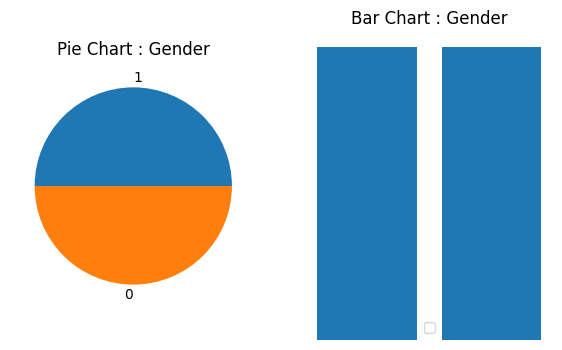

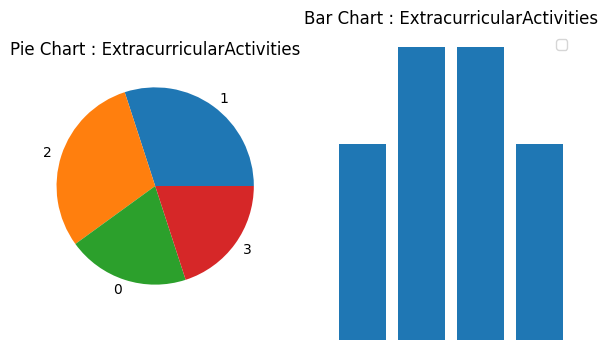

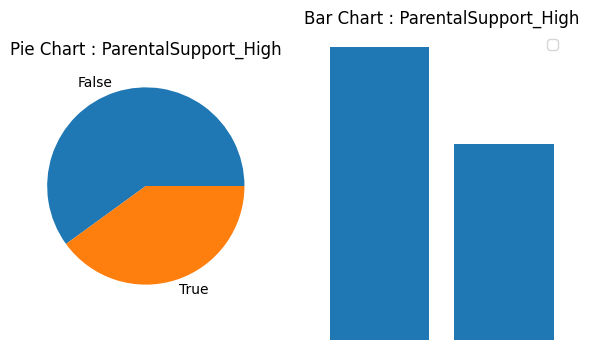

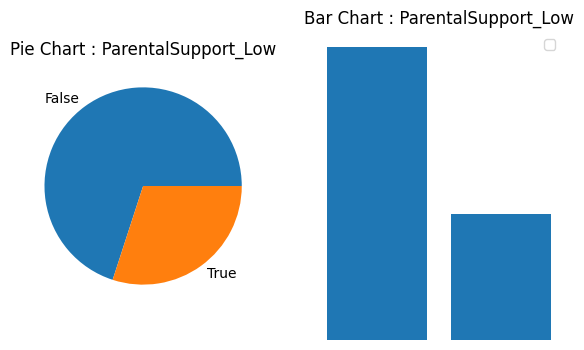

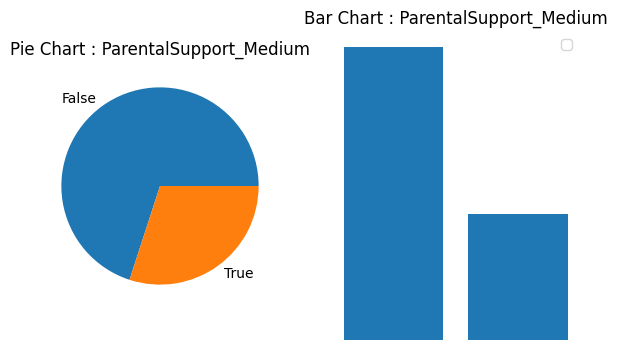

In [ ]:
values = ['Gender','ExtracurricularActivities','ParentalSupport_High','ParentalSupport_Low','ParentalSupport_Medium']
for i in values:
    val = data[i].value_counts()  # Get frequency counts of each unique value in the column
    idx = val.index  # Extract the categories (unique values)
    vals = val.values  # Extract the frequencies

    # Create a figure with 2 subplots arranged horizontally
    fig, ax = plt.subplots(1, 2, figsize=(7, 4))

    # Plot a pie chart
    ax[0].pie(vals, labels=idx)  # Display pie chart with values and labels
    ax[0].set_title(f"Pie Chart : {i}")  # Add title to the pie chart

    # Plot a bar chart
    ax[1].bar(idx, vals)  # Bar chart with categories on x-axis and frequencies on y-axis
    ax[1].set_title(f"Bar Chart : {i}")  # Add title to the bar chart

    # Turn off the axis for the bar chart (to declutter the visualization)
    ax[1].axis('off')


    plt.legend()

Plot for the Continuous Values

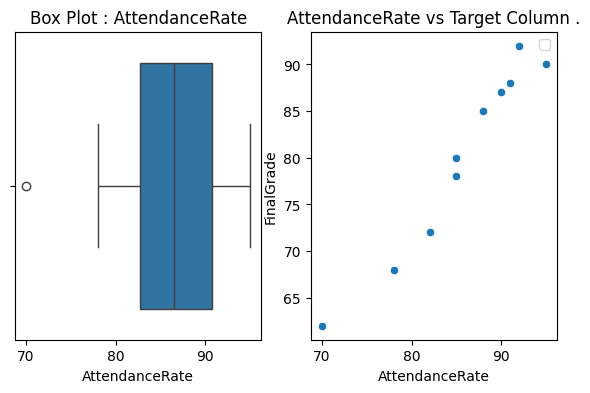

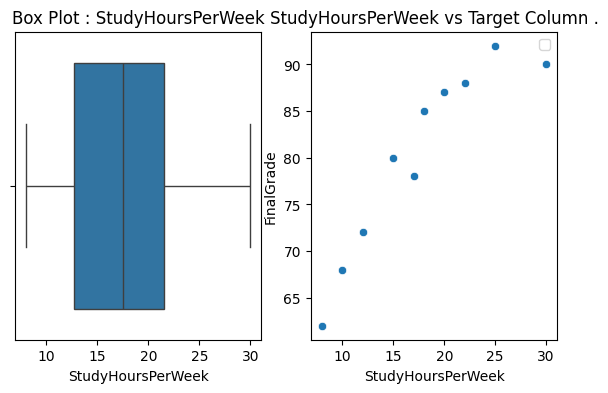

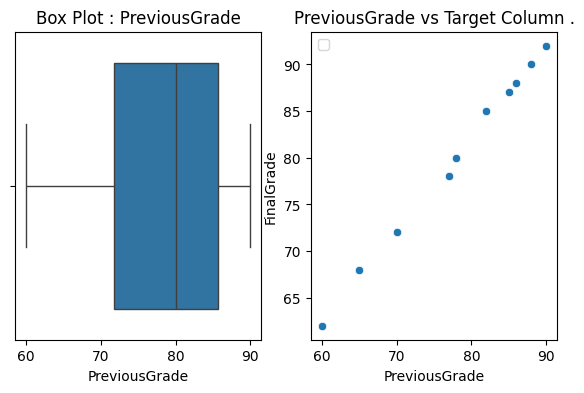

In [ ]:
cols = ['AttendanceRate','StudyHoursPerWeek','PreviousGrade','FinalGrade']
for i in cols[:-1]:
    vals = data[i]
    fig,ax = plt.subplots(1,2,figsize=(7,4))
    sns.boxplot(data = data,x=i,ax=ax[0])
    ax[0].set_title(f"Box Plot : {i}")
    sns.scatterplot(data=df,x=i,y='FinalGrade',ax=ax[1])
    ax[1].set_title(f"{i} vs Target Column .")
    plt.legend()
    plt.show()

Split the dataset into the Features and Labels

In [ ]:
data = data.drop('Name',axis=1)

In [ ]:
data.columns

Index(['Gender', 'AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade',
       'ExtracurricularActivities', 'FinalGrade', 'ParentalSupport_High',
       'ParentalSupport_Low', 'ParentalSupport_Medium'],
      dtype='object')

In [ ]:
x=data.drop('FinalGrade',axis=1)
y=data['FinalGrade']

In [ ]:
x

,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport_High,ParentalSupport_Low,ParentalSupport_Medium
0,1,85,15,78,1,True,False,False
1,0,90,20,85,2,False,False,True
2,1,78,10,65,0,False,True,False
3,1,92,25,90,3,True,False,False
4,0,88,18,82,2,False,False,True
5,0,95,30,88,1,True,False,False
6,1,70,8,60,0,False,True,False
7,0,85,17,77,1,False,False,True
8,1,82,12,70,2,False,True,False
9,0,91,22,86,3,True,False,False


In [ ]:
y

,FinalGrade
0,80
1,87
2,68
3,92
4,85
5,90
6,62
7,78
8,72
9,88


Split it into the training and testing purpose

In [35]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [36]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [40]:
from sklearn.linear_model import Lasso
# Import regression models
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from joblib import Parallel, delayed  # Import Parallel and delayed
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [41]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.1513
- Mean Absolute Error: 2.0438
- R2 Score: 0.9177


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.5990
- Mean Absolute Error: 0.4419
- R2 Score: 0.9964
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2045
- Mean Absolute Error: 0.1491
- R2 Score: 0.9993


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.4787
- Mean Absolute Error: 0.3264
- R2 Score: 0.9977
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.0594
- Mean Absolute Error: 0.7566
- R2 Score: 0.9800


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.5727
- Mean Absolute Error: 3.9750
- R2 Score: 0.6909
-----------------------

In [42]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Lasso,0.999257
2,Ridge,0.980049
0,Linear Regression,0.917723
3,K-Neighbors Regressor,0.888711
5,Random Forest Regressor,0.857258
4,Decision Tree,0.822222
7,AdaBoost Regressor,0.822222
6,XGBRegressor,0.822218


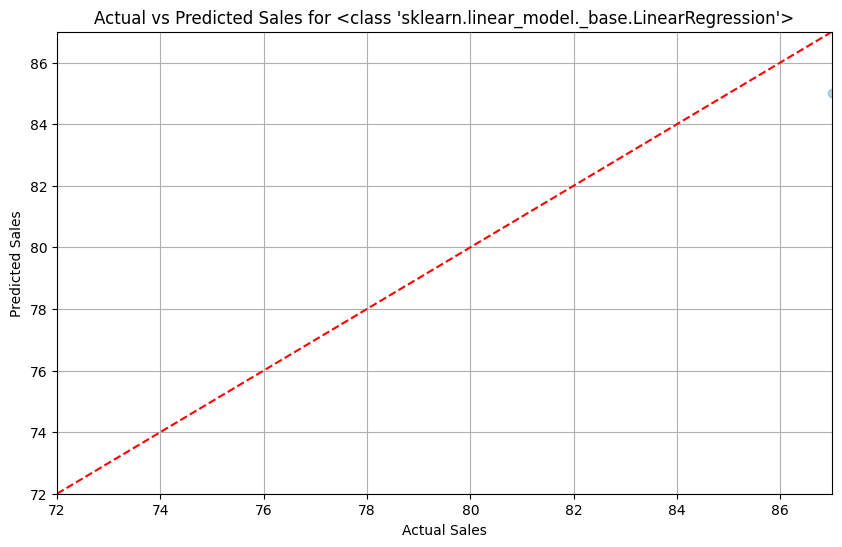

In [43]:
y_pred = y_test_pred  # Get predictions from the current model

# Plot Actual vs. Predicted Sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title(f"Actual vs Predicted Sales for {LinearRegression}")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlim([y_test.min(), y_test.max()])  # Set x-axis limits
plt.ylim([y_test.min(), y_test.max()])  # Set y-axis limits
plt.grid(True)  # Add grid for better readability
plt.show()

### **Interpretation**
- The plot compares **actual sales** and **predicted sales** using Linear Regression.  
- The **red dashed line** represents perfect predictions.  
- Points are close to the line, showing the model predicts sales accurately.  
- Minor deviations exist but are acceptable.  
- The model is reliable for predicting sales in this dataset.  

### **Recommendations**
- Use the Linear Regression model for sales forecasting.  
- Validate its performance with new datasets periodically.  
- Explore other models like **Lasso Regression** for potential improvements.  
- Leverage predictions to optimize sales strategies.  
- Analyze residual errors to ensure model assumptions hold.  


In [44]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
8,72,68.0,4.0
1,87,85.0,2.0


In [45]:
import pickle

# `lasso_model` is the trained Lasso Regression model
lasso_model = ...  # Replace with trained Lasso model

# Save the model to a file
lasso_model = 'lasso_model.pkl'
with open(lasso_model, 'wb') as file:
    pickle.dump(lasso_model, file)

print(f"Model saved as {lasso_model}")


Model saved as lasso_model.pkl
